<Figure size 432x288 with 0 Axes>

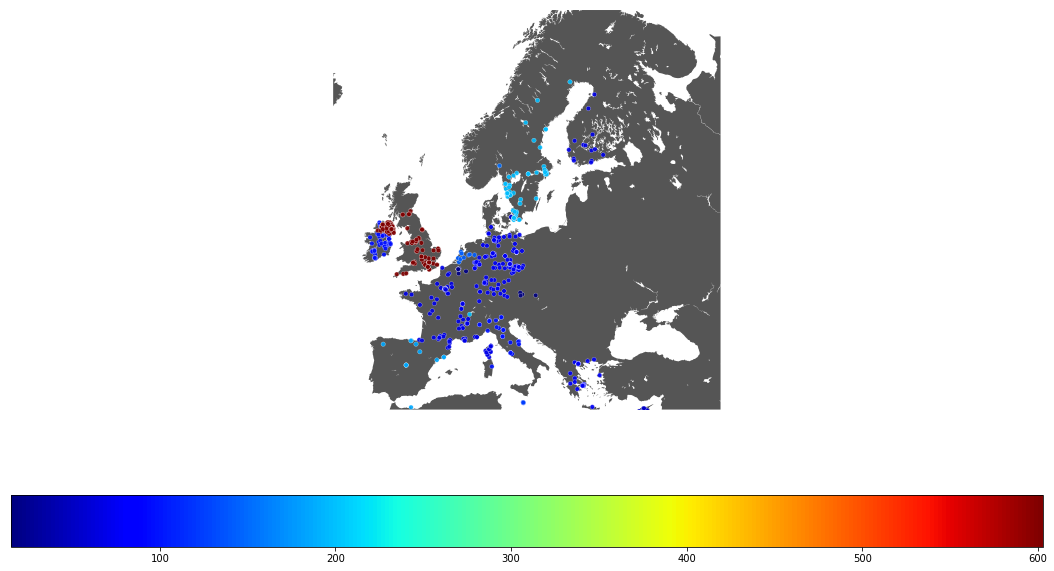

In [7]:
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, MultiPoint
import pandas as pd
import matplotlib.pyplot as plt
import mplleaflet
import matplotlib.cm as cm
import matplotlib.colors as co
import numpy as np

# To display world map
europe = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-15, 
        llcrnrlat=35,
        urcrnrlon=45,
        urcrnrlat=70,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

gtd_dataframe = pd.read_csv('Features pre-processed.csv', 
                            usecols=["eventid", "country", "region_txt", "longitude", "latitude", "iyear", "nkill", "gname",
                                     "weaptype1", "related"]);
gtd_dataframe.columns;

#gtd_dataframe = gtd_dataframe.dropna()
europe_dataframe = gtd_dataframe.loc[gtd_dataframe['region_txt'] == 'Western Europe']

europe_points = pd.Series(
                [Point(europe(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(europe_dataframe['longitude'], 
                                               europe_dataframe['latitude'])])

europe_repoints = MultiPoint(list(europe_points.values));

europe_country = europe_dataframe['country'];
cmap = plt.cm.jet;

europe_norm = co.Normalize(vmin=europe_country.min(), vmax=europe_country.max());
europecolors = plt.cm.ScalarMappable(europe_norm, cmap);
europe_col = europecolors.to_rgba(europe_country);

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.set_size_inches(18.5, 10.5)

# Create a scatterplot on the map
dev = europe.scatter(
            [geom.x for geom in europe_points],
            [geom.y for geom in europe_points],
            20, marker='o', lw=.25,
            facecolor=europe_col, edgecolor='w',
            alpha=0.9,antialiased=True,
            zorder=5)

sm = cm.ScalarMappable(norm=europe_norm, cmap=cmap);
sm.set_array([]) # can be an empty list
# ...
cb = fig.colorbar(sm, ax=ax, orientation='horizontal');

europe.fillcontinents(color='#555555');
#plt.savefig("europe.png")


<Figure size 432x288 with 0 Axes>

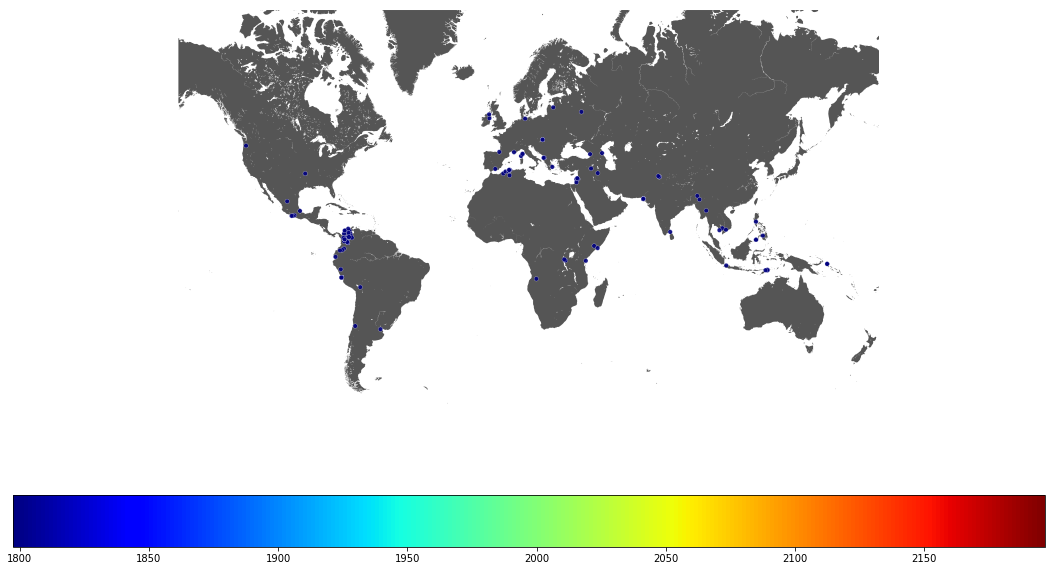

In [5]:
world = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-155, 
        llcrnrlat=-60,
        urcrnrlon=180,
        urcrnrlat=75,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

gtd_test = pd.read_csv('gtd_test.csv', 
                            usecols=["eventid", "country", "region_txt", "longitude", "latitude", "iyear"]);
#"nkill", "gname", "weaptype1", "related"]);

gtd_test.columns;

world_points = pd.Series(
                [Point(world(mapped_x, mapped_y)) 
                 for mapped_x, mapped_y in zip(gtd_test['longitude'],
                                               gtd_test['latitude'])]);

world_repoints = MultiPoint(list(world_points.values));

country = gtd_test['country'];
world_year = gtd_test['iyear'];
#tree_of_life[tree_of_life['rank'] == 'species'].head()

world_norm = co.Normalize(vmin=world_year.min(), vmax=world_year.max());
world_pointcolors = plt.cm.ScalarMappable(world_norm, cmap);
world_col = world_pointcolors.to_rgba(world_year);

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.set_size_inches(18.5, 10.5)

# Create a scatterplot on the map
dev = world.scatter(
            [geom.x for geom in world_points],
            [geom.y for geom in world_points],
            20, marker='o', lw=.25,
            facecolor=world_col, edgecolor='w',
            alpha=0.9,antialiased=True,
            zorder=3)

sm = cm.ScalarMappable(norm=world_norm, cmap=cmap);
sm.set_array([]) # can be an empty list
# ...
cb = fig.colorbar(sm, ax=ax, orientation='horizontal');

world.fillcontinents(color='#555555');
#plt.savefig("15kills.png")

In [3]:
# Define the adjacency matrix for nkill > 20
import math
import pandas as pd
gtd_kills
n_nodes = gtd_kills.shape[0]
related = gtd_kills["related"]
eventId = gtd_kills["eventid"]

adjacency_matrix = np.zeros((n_nodes, n_nodes))
adjacency_matrix.shape
    
invalidNodes = pd.isnull(related)

for i in range(0, n_nodes):
    if (invalidNodes[i] == False):
        for j in range(0, n_nodes):
            if (str(eventId[j]) in related[i]):
                adjacency_matrix[i][j] = 1